In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y_true = make_blobs(n_samples=500, centers=3, cluster_std=0.60, random_state=42)

In [4]:
df = pd.DataFrame(X,columns=['Feature_1','Feature_2'])
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [6]:
inertia = []
k_range = range(1,11)

In [9]:
for k in k_range:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

In [10]:
inertia

[1000.0000000000001,
 297.8954141051722,
 11.575484723104982,
 9.752067977356843,
 8.25717527244628,
 6.917577320416798,
 6.334755391595288,
 5.704177177901429,
 5.060234133532076,
 4.762361898130397]

In [18]:
# aka wcss

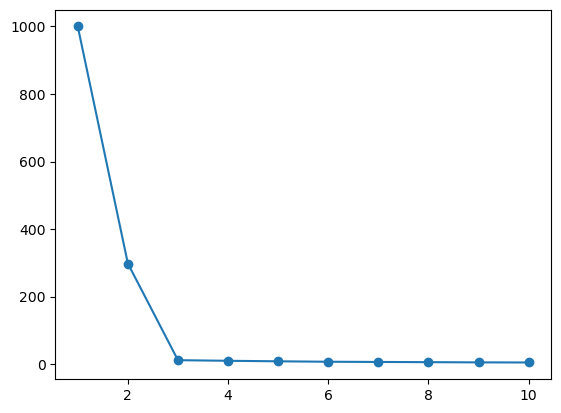

In [13]:
plt.plot(k_range,inertia,marker= 'o')

In [14]:
kmeans_final = KMeans(n_clusters=3, random_state=42)

In [15]:
cluster_labels = kmeans_final.fit_predict(X_scaled)

In [16]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

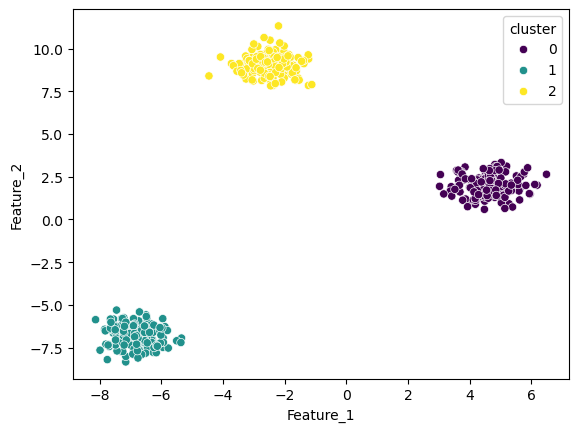

In [17]:
sns.scatterplot(x=df['Feature_1'],y=df['Feature_2'],hue = df['cluster'],palette='viridis')

In [23]:
from sklearn.datasets import make_moons

In [24]:
x,y_true = make_moons(n_samples=500,noise=0.05,random_state=42)

In [25]:
from sklearn.cluster import KMeans, DBSCAN

In [26]:
df = pd.DataFrame(x, columns=['Feature_1','Feature_2'])

In [27]:
df

,Feature_1,Feature_2
0,0.830586,-0.447733
1,0.701678,0.816918
2,1.022080,-0.492571
3,-0.316765,0.953438
4,0.293226,1.057185
...,...,...
495,0.239754,0.985462
496,0.072145,0.184834
497,0.590273,-0.365577
498,1.619465,-0.283658


In [28]:
scaler =StandardScaler()
x_scaled = scaler.fit_transform(df)

In [29]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans_labels = kmeans.fit_predict(x_scaled)

In [30]:
df['kmeans_cluster'] = kmeans_labels

In [31]:
df

,Feature_1,Feature_2,kmeans_cluster
0,0.830586,-0.447733,1
1,0.701678,0.816918,0
2,1.022080,-0.492571,1
3,-0.316765,0.953438,0
4,0.293226,1.057185,0
...,...,...,...
495,0.239754,0.985462,0
496,0.072145,0.184834,0
497,0.590273,-0.365577,1
498,1.619465,-0.283658,1


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

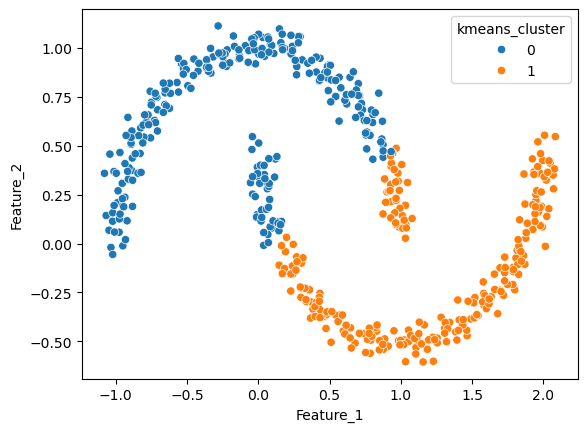

In [35]:
sns.scatterplot(x=df['Feature_1'],y=df['Feature_2'],hue=df['kmeans_cluster'],palette='tab10')

In [39]:
dbscan = DBSCAN(eps=0.3,min_samples=5)
dbscan_labels = dbscan.fit_predict(x_scaled)

In [40]:
df['dbscan_cluster'] = dbscan_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

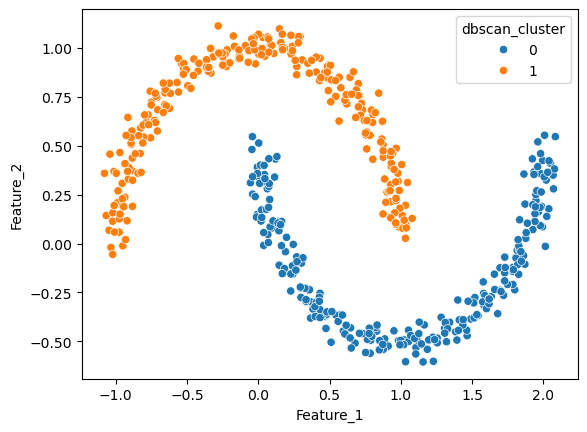

In [41]:
sns.scatterplot(x=df['Feature_1'],y=df['Feature_2'],hue=df['dbscan_cluster'],palette='tab10')